In [1]:
library(tidyverse)
library(ape)
library(microbiome)
library(ggthemes)     # additional themes fro ggplot2
library(ggpubr)
library(vegan)
library(repr)
library(ggpmisc)      # to use stat_poly_eq
library(RColorBrewer) # nice color options
library(gridExtra)    # gridding plots
library(viridis)
library(ggrepel)
#library(wesanderson) #new palettes http://www.sthda.com/english/wiki/ggplot2-colors-how-to-change-colors-automatically-and-manually
library(rioja)        # plotting poackages for tabular bubbleplots
library(reshape2) 
library(dada2)
library(DECIPHER)
#library(ggtern)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘ape’


The following object is masked from ‘package:dplyr’:

    where


Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform



Attaching package: ‘ggpubr’




In [2]:
options(repr.plot.width=12, repr.plot.height=8)
set.seed(10000)

theme_glab <- function(base_size = 20,
                    base_family = "",
                    base_line_size = base_size / 180,
                    base_rect_size = base_size / 180) {
   
    font <- "Helvetica" #assign font family up front
   
    theme_bw(base_size = base_size,
                base_family = base_family,
                base_line_size = base_line_size) %+replace%
    theme(
        legend.background =  element_blank(),
        legend.title =       element_text(color = rgb(100, 100, 100, maxColorValue = 255),
                                          size = rel(0.65),
                                         hjust = 0),
        legend.text =        element_text(color = rgb(100, 100, 100, maxColorValue = 255),
                                          size = rel(0.65)),
        legend.key.size =    unit(0.8, "lines"),
     
      plot.title = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        hjust = 0),
       
      axis.title = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.65)),
      axis.text = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.65)),
       
      plot.caption = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),nmds_unif_df1_jw
        size = rel(0.7),
        hjust = 1),
       
      panel.grid.major = element_blank(),  
      panel.grid.minor = element_blank(),  
      panel.border = element_rect(fill = NA, colour = rgb(100, 100, 100, maxColorValue = 255)),

     
      complete = TRUE
    )
}


In [112]:
CAs_otu_raw <- read.csv("dataset_CoEvolve/Coevolve_distribution_proks.csv", sep="\t", header=TRUE)

CAs_otu_raw

Expedition,hmm,CA_class,Total.coverage,Normalized_total_coverage,Sample
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
arg19,Alpha_CA_prok,Alpha,18.1284,0.62942824,AG11
arg19,Alpha_CA_prok,Alpha,16.0836,0.40440682,AG19
arg19,Alpha_CA_prok,Alpha,58.5673,0.67315113,AG1
arg19,Alpha_CA_prok,Alpha,14.7281,0.33881677,AG3
arg19,Alpha_CA_prok,Alpha,105.3205,2.25344190,AO190224-f
arg19,Alpha_CA_prok,Alpha,1249.2500,115.77900293,BJ190227-f
arg19,Alpha_CA_prok,Alpha,162.7612,5.77549173,PG190225-f
arg19,Alpha_CA_prok,Alpha,115.6349,2.84516220,PM190223-f
arg19,Alpha_CA_prok,Alpha,17.5827,0.52853697,VV190228-f


## OTU_table

In [4]:
subset1 <- as.data.frame(CAs_otu_raw[, c("hmm", "Normalized_total_coverage", "Sample")])
subset2 <- subset1[!duplicated(subset1),]
otu_table <- as.data.frame(subset2 %>% pivot_wider(names_from = Sample, 
                                                   values_from = Normalized_total_coverage, 
                                                   values_fill = list(Value = 0)))
row.names(otu_table) <- otu_table$hmm
otu_table$hmm <- NULL


otu_table


,AG11,AG19,AG1,AG3,AO190224-f,BJ190227-f,PG190225-f,PM190223-f,VV190228-f,BM200304F,⋯,HV-1-S,KR-1-F,KR-1-S,KR-2-F,KR-2-S,AG5,EM200307F,EM200307S,BQS,f15
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alpha_CA_prok,0.6294282,0.4044068,0.6731511,0.3388168,2.2534419,115.7790,5.775492,2.845162,0.5285370,5.541804,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Beta_CA_arch,1.4006414,1.4622546,1.1098483,7.2359227,7.4557955,167.5848,10.540915,3.994773,2.4646752,6.388322,⋯,144.91188,23.224442,60.265454,83.635556,60.55595,NA,NA,NA,NA,NA
Beta_CA_prok,2.1759689,2.4111634,1.2723821,9.6167361,5.2913761,168.3473,5.518066,5.171825,1.8757987,6.388322,⋯,61.25376,2.860304,3.777192,4.545954,NA,NA,NA,NA,NA,NA
Epsilon_CA_prok,7.6768135,NA,0.2304002,NA,0.4676319,NA,10.703583,1.168960,0.8424151,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Gamma_CA_prok,7.0067657,2.5975411,4.1934433,13.7333319,12.9424084,135.1830,4.368973,26.054900,5.0216619,7.002997,⋯,150.59168,34.344968,98.686599,121.733468,72.40057,8.521976,0.3312554,1.443318,352.617,177.4402
Gamma_CA_arch,73.2070449,37.1442541,33.0042169,72.5741420,57.7692465,643.5477,91.957935,104.028333,42.3482965,35.695843,⋯,504.66105,75.818168,231.179982,286.510394,196.09878,105.513857,16.2992319,10.204371,1178.834,NA


In [5]:
otu_table_final <- as.data.frame(otu_table)
otu_table_final[is.na(otu_table_final)] <- 0

otu_table_final

,AG11,AG19,AG1,AG3,AO190224-f,BJ190227-f,PG190225-f,PM190223-f,VV190228-f,BM200304F,⋯,HV-1-S,KR-1-F,KR-1-S,KR-2-F,KR-2-S,AG5,EM200307F,EM200307S,BQS,f15
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alpha_CA_prok,0.6294282,0.4044068,0.6731511,0.3388168,2.2534419,115.7790,5.775492,2.845162,0.5285370,5.541804,⋯,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000000,0.000000,0.000,0.0000
Beta_CA_arch,1.4006414,1.4622546,1.1098483,7.2359227,7.4557955,167.5848,10.540915,3.994773,2.4646752,6.388322,⋯,144.91188,23.224442,60.265454,83.635556,60.55595,0.000000,0.0000000,0.000000,0.000,0.0000
Beta_CA_prok,2.1759689,2.4111634,1.2723821,9.6167361,5.2913761,168.3473,5.518066,5.171825,1.8757987,6.388322,⋯,61.25376,2.860304,3.777192,4.545954,0.00000,0.000000,0.0000000,0.000000,0.000,0.0000
Epsilon_CA_prok,7.6768135,0.0000000,0.2304002,0.0000000,0.4676319,0.0000,10.703583,1.168960,0.8424151,0.000000,⋯,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000000,0.000000,0.000,0.0000
Gamma_CA_prok,7.0067657,2.5975411,4.1934433,13.7333319,12.9424084,135.1830,4.368973,26.054900,5.0216619,7.002997,⋯,150.59168,34.344968,98.686599,121.733468,72.40057,8.521976,0.3312554,1.443318,352.617,177.4402
Gamma_CA_arch,73.2070449,37.1442541,33.0042169,72.5741420,57.7692465,643.5477,91.957935,104.028333,42.3482965,35.695843,⋯,504.66105,75.818168,231.179982,286.510394,196.09878,105.513857,16.2992319,10.204371,1178.834,0.0000


## Taxa_table 
(hmm our case)

In [6]:
tax_table_raw  <- as.data.frame(CAs_otu_raw[, c("hmm", "CA_class")])
tax_table <- tax_table_raw[!duplicated(tax_table_raw), ]
row.names(tax_table) <- tax_table$hmm

tax_table

tax_table <- as.matrix(tax_table)

,hmm,CA_class
,<chr>,<chr>
Alpha_CA_prok,Alpha_CA_prok,Alpha
Beta_CA_arch,Beta_CA_arch,Beta
Beta_CA_prok,Beta_CA_prok,Beta
Epsilon_CA_prok,Epsilon_CA_prok,Epsilon
Gamma_CA_prok,Gamma_CA_prok,Gamma
Gamma_CA_arch,Gamma_CA_arch,Gamma


## Sample_data

In [7]:
sample_data <- read.csv("dataset_CoEvolve/Coevolve_env_data.csv", row.names=1)
sample_data_final <-as.data.frame(sample_data)
sample_data_final

,expedition,nation,site_name,latitude,longitude,type,temperature,pH,C13,dissolved_oxygen,salinity,alkalinity,spc
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AG1,ARG19,Argentina,Incachule,-24.282129,-66.46676,S,46.90,6.52,NA,10.0,1.54,NA,3000.0
AG11,ARG19,Argentina,Pastos Grandes,-24.364589,-66.57113,S,44.90,8.74,-15.33,50.0,0.61,15.400,1288.0
AG13,ARG19,Argentina,Galán Fumaroles (El Diablo),-25.858188,-66.99269,S,80.00,7.75,-14.81,10.0,0.19,NA,429.0
AG15,ARG19,Argentina,Galán Fumaroles (El Diablo),-25.858243,-66.99282,S,80.00,3.21,-12.40,60.0,1.02,21.120,2050.0
AG17,ARG19,Argentina,Galán La Colcha,-26.032911,-66.98609,BG,84.00,6.94,-2.62,20.0,6.10,300.080,10618.0
AG19,ARG19,Argentina,Botijuela,-25.743034,-67.82325,S,40.00,6.44,NA,10.0,8.65,700.480,14643.0
AG22,ARG19,Argentina,Rosario de la Frontera,-25.409860,-64.59134,S,82.00,8.23,-8.28,0.0,1.57,151.800,3056.0
AG24,ARG19,Argentina,El Galpón,-24.409860,-64.59146,S,54.30,8.47,-10.67,0.0,1.81,94.662,3474.0
AG3,ARG19,Argentina,Pompeya,-24.246688,-66.36272,S,50.30,6.53,-5.33,10.0,5.09,930.309,9000.0


## PHYLOSEQ

In [51]:
CAs <- phyloseq(
    otu_table(otu_table_final, taxa_are_rows = T),
    tax_table(tax_table),
    sample_data(sample_data_final)
)

CAs

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 6 taxa and 140 samples ]
sample_data() Sample Data:       [ 140 samples by 13 sample variables ]
tax_table()   Taxonomy Table:    [ 6 taxa by 2 taxonomic ranks ]

## Alpha-diversity

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


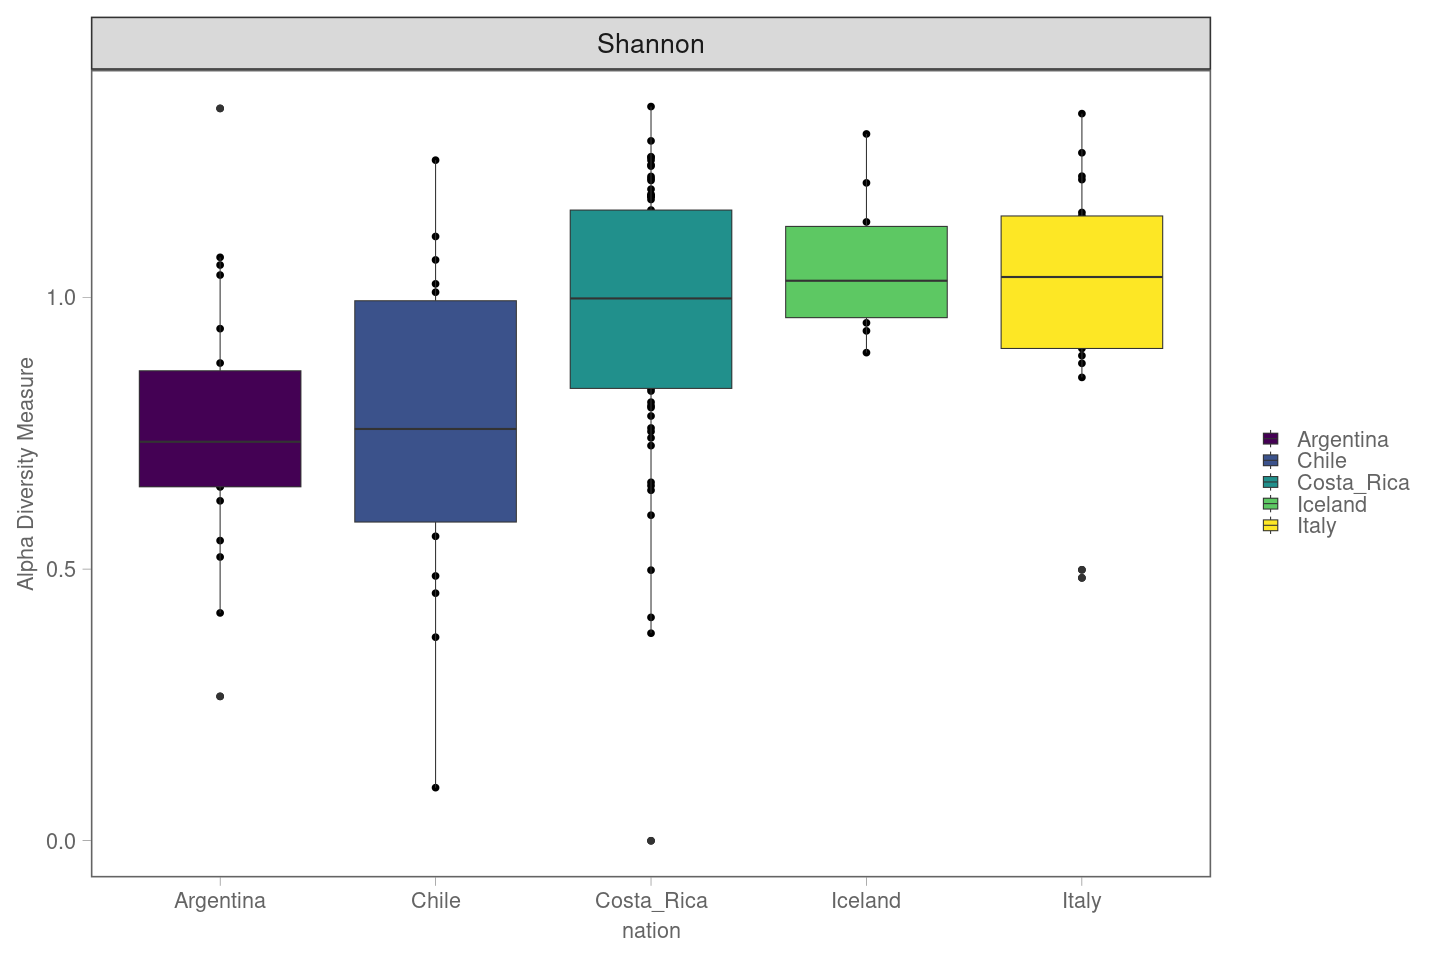

In [56]:
p.alph_div <- plot_richness(CAs, measures=c("shannon"), x="nation") + 

geom_boxplot(aes(fill=nation), lwd=0.3) +  

scale_fill_viridis(discrete=T) +

#scale_fill_manual(values = c("#B2182B", "#D6604D", "#F4A582", "#FDDBC7", "#D1E5F0"),
                  #labels=c("x","y","z")) +

#scale_x_discrete(name="",labels=c("x","y","z")) +

theme_glab() + theme(legend.title = element_blank())

p.alph_div

In [69]:
data.frame(sample_data(CAs))

,expedition,nation,site_name,latitude,longitude,type,temperature,pH,C13,dissolved_oxygen,salinity,alkalinity,spc
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AG11,ARG19,Argentina,Pastos Grandes,-24.364589,-66.57113,S,44.90,8.74,-15.33,50.0,0.61,15.400,1288.0
AG19,ARG19,Argentina,Botijuela,-25.743034,-67.82325,S,40.00,6.44,NA,10.0,8.65,700.480,14643.0
AG1,ARG19,Argentina,Incachule,-24.282129,-66.46676,S,46.90,6.52,NA,10.0,1.54,NA,3000.0
AG3,ARG19,Argentina,Pompeya,-24.246688,-66.36272,S,50.30,6.53,-5.33,10.0,5.09,930.309,9000.0
AO190224-f,ARG19,Argentina,Antuco,-24.182136,-66.67403,F,27.80,6.25,-7.66,90.0,21.21,239.800,33411.0
BJ190227-f,ARG19,Argentina,Botijuela,-25.743034,-67.82325,F,40.00,6.44,NA,10.0,8.65,700.480,14643.0
PG190225-f,ARG19,Argentina,Pastos Grandes,-24.364589,-66.57113,F,44.90,8.74,-15.33,50.0,0.61,15.400,1288.0
PM190223-f,ARG19,Argentina,Pompeya,-24.246688,-66.36272,F,50.30,6.53,-5.33,10.0,5.09,930.309,9000.0
VV190228-f,ARG19,Argentina,Villa Vil,-27.112858,-66.82224,F,38.20,9.09,-13.28,60.0,0.40,29.040,869.0


In [74]:
CAs_alpha <- data.frame(
                        estimate_richness(CAs, measures = c("Shannon")),
                        data.frame(sample_data(CAs)$temperature),
                        data.frame(sample_data(CAs)$pH),
                        data.frame(sample_data(CAs)$salinity),
                        data.frame(sample_data(CAs)$nation)
)
CAs_alpha

Warning message in estimate_richness(CAs, measures = c("Shannon")):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


,Shannon,sample_data.CAs..temperature,sample_data.CAs..pH,sample_data.CAs..salinity,sample_data.CAs..nation
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AG11,0.7717831,44.90,8.74,0.61,Argentina
AG19,0.6255782,40.00,6.44,8.65,Argentina
AG1,0.7062701,46.90,6.52,1.54,Argentina
AG3,0.9424044,50.30,6.53,5.09,Argentina
AO190224-f,1.0595026,27.80,6.25,21.21,Argentina
BJ190227-f,1.3476917,40.00,6.44,8.65,Argentina
PG190225-f,1.0410646,44.90,8.74,0.61,Argentina
PM190223-f,0.8791561,50.30,6.53,5.09,Argentina
VV190228-f,0.7756175,38.20,9.09,0.40,Argentina


Warning message:
“Removed 10 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”


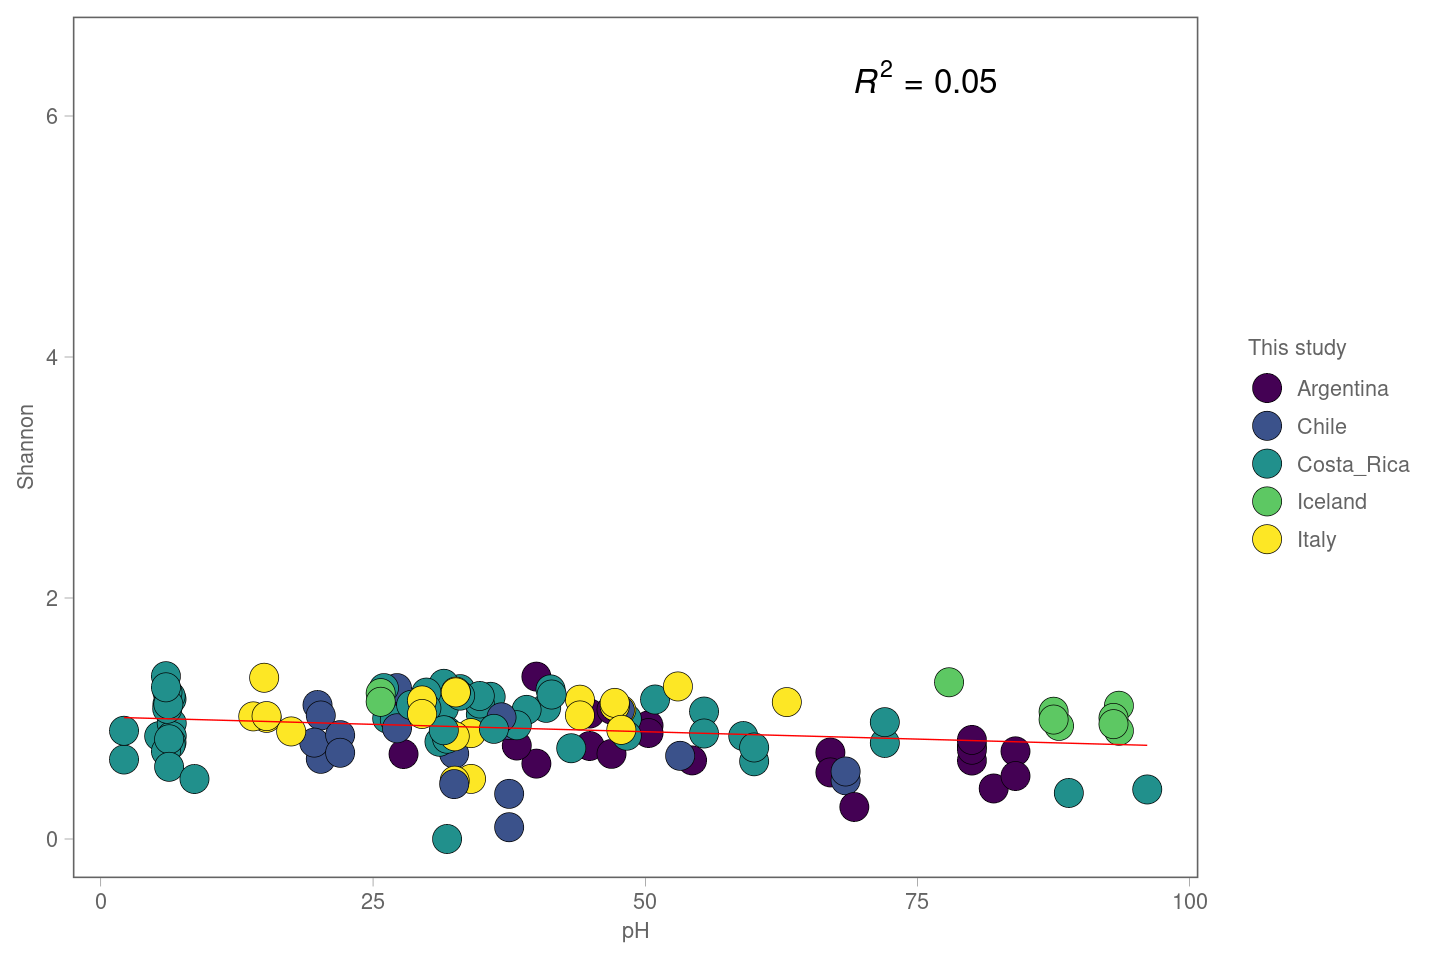

In [77]:
p.shan_temp <-ggplot(CAs_alpha,aes(x=sample_data.CAs..temperature,y=Shannon)) + 
geom_point(size=8,aes(fill=sample_data.CAs..nation),stroke=.3, shape=21)  +
scale_fill_viridis(discrete=TRUE) +
# scale_fill_manual(values=c("#440154","#3b528b","#2a788e","#fde725")) +
# geom_text(aes(label= sample_data.prok_ndata..code), size=5, hjust=-0.1, vjust=2.2) +
stat_poly_eq(formula = y ~ x, aes(label = paste(..rr.label.., sep = "~~")), parse = TRUE,hjust=-5,size=7) +
             geom_smooth(method=lm, formula= y~x,  se=FALSE,color="red",size=.4) +
xlab("pH") + 
guides(fill = guide_legend(override.aes = list(shape = 21) ),
            shape = guide_legend(override.aes = list(fill = "black"))) + 
labs(fill="This study", shape="Sample type") + 
ylim(NA,6.5) +
theme_glab()

p.shan_temp

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


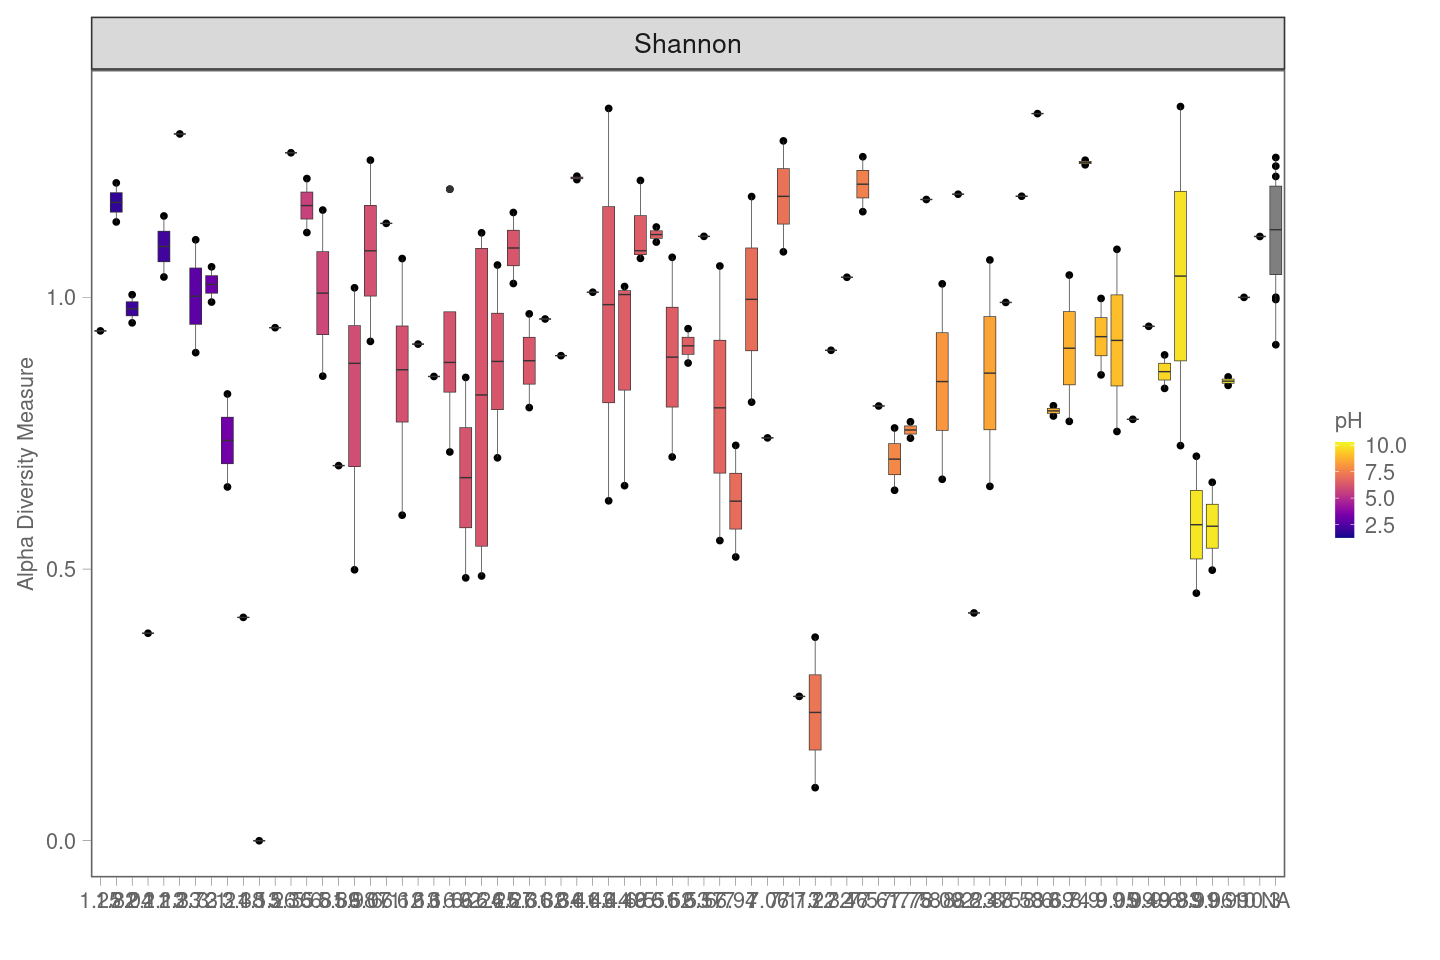

In [58]:
plot_richness(CAs, measures=c("shannon"), x="as.factor(pH)") + 
geom_boxplot(aes(fill=pH),lwd=0.2) +  

scale_fill_viridis(discrete=F,option="plasma") + 


labs(x="") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),
                     axis.text=element_text(size=12,face="bold")) + theme_glab()

In [78]:
CAs_norm = transform_sample_counts(CAs, function(x){x / sum(x)})
CAs_norm

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 6 taxa and 140 samples ]
sample_data() Sample Data:       [ 140 samples by 13 sample variables ]
tax_table()   Taxonomy Table:    [ 6 taxa by 2 taxonomic ranks ]

## Barplots

In [79]:
CAs_hmm = tax_glom(CAs_norm, "hmm", NArm = FALSE)
CAs_hmm

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 6 taxa and 140 samples ]
sample_data() Sample Data:       [ 140 samples by 13 sample variables ]
tax_table()   Taxonomy Table:    [ 6 taxa by 2 taxonomic ranks ]

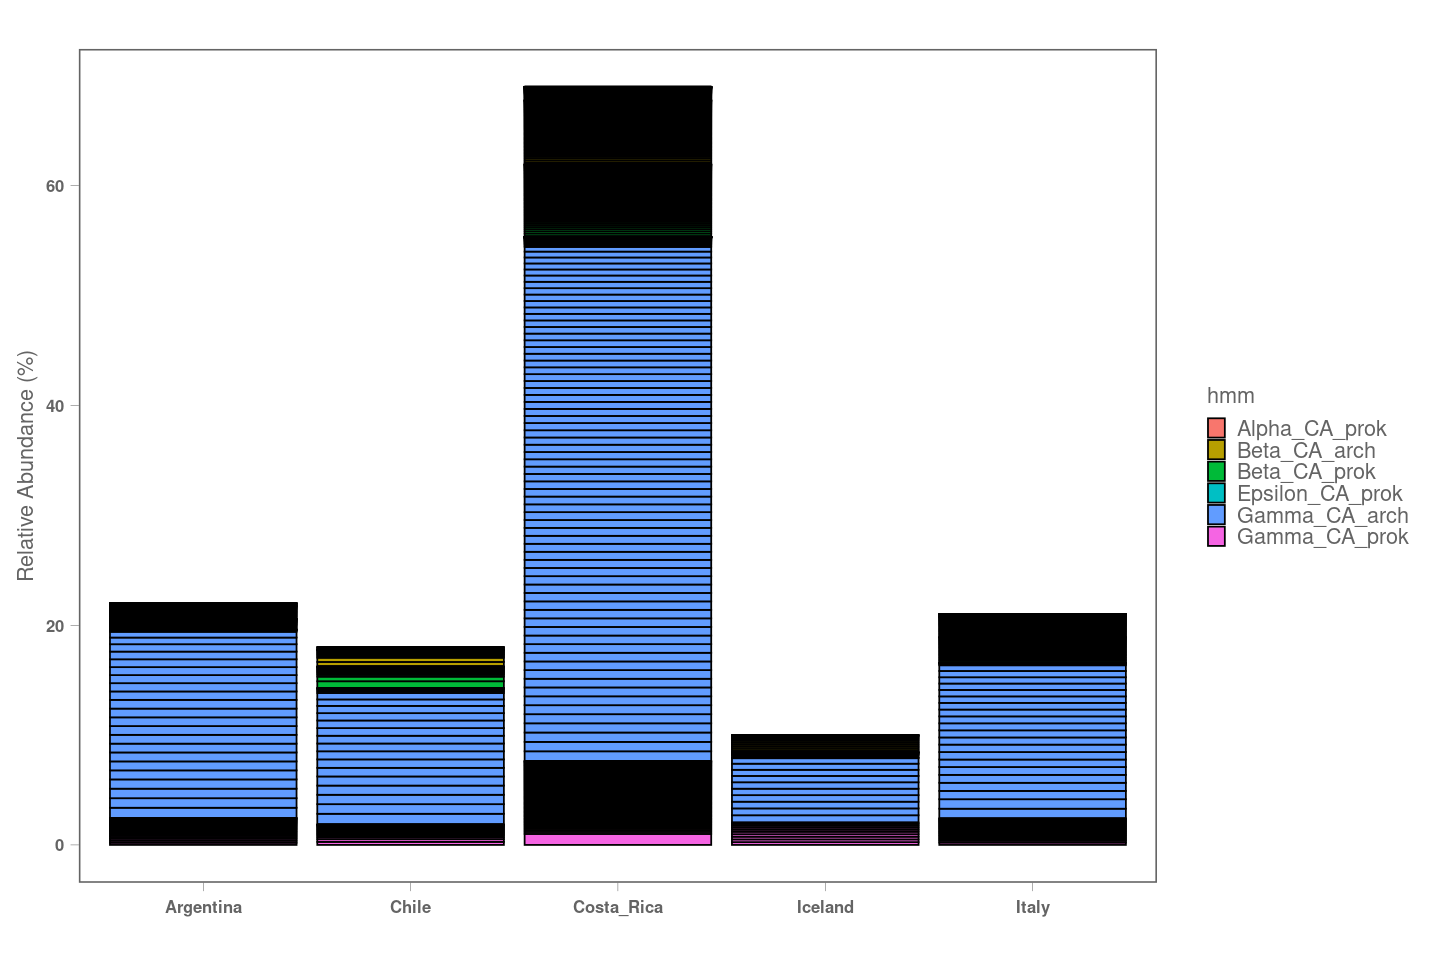

In [80]:
phyl_bio <- plot_bar(subset_samples(CAs_hmm), fill="hmm", x="nation", title = "") +  

#gghighlight(phyl_bio$data$Abundance > 0.009, use_group_by = FALSE) +

labs(x="",
     y="Relative Abundance (%)") +

theme_glab() + theme(legend.position = "right")+
theme(axis.text.x = element_text(angle = 0, vjust = 0.25, hjust=0.5),
      axis.text=element_text(size=10,face="bold")) 

phyl_bio

## Beta-Diversity analysis

## NMDS Jaccard similarity index: Weighted and Unweighted

## Weighted PCoA Jaccard

In [9]:
CAs_wjak <- phyloseq::distance(CAs, method = "bray")
CAs_jw <- ordinate(CAs,CAs_wjak, method = "PCoA")
evals_jw <- CAs_jw$values$Eigenvalues

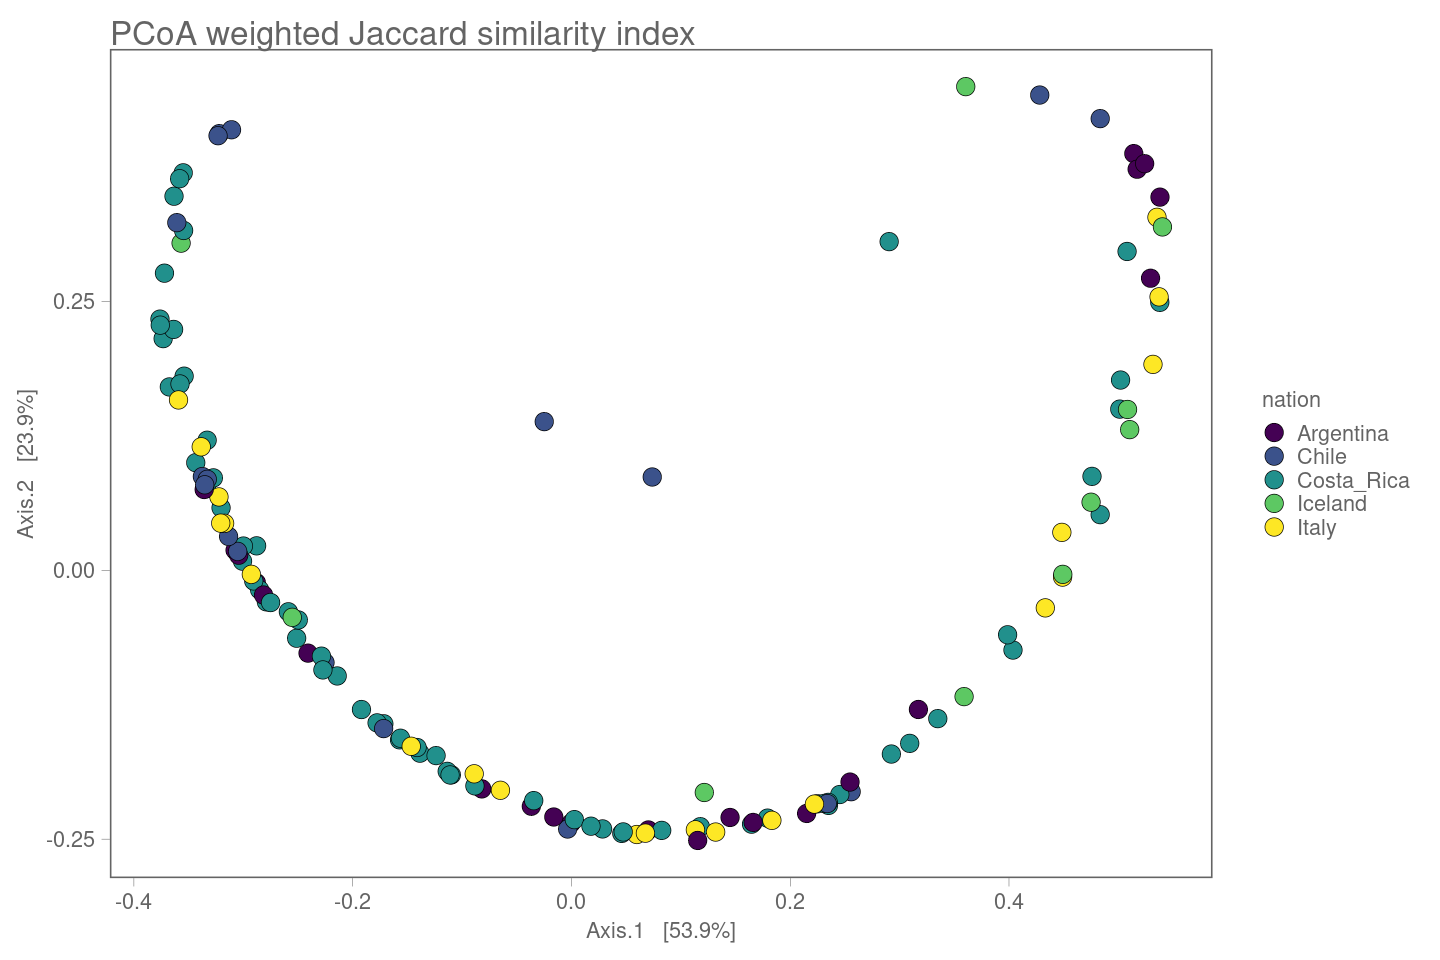

In [10]:
p1 <- plot_ordination(CAs, CAs_jw, type="sample", title="PCoA weighted Jaccard similarity index") +
#coord_fixed(sqrt(evals_jw[2] / evals_jw[1]))  + 
geom_point(aes(fill=nation), size=5, shape=21, stroke=0.3) + 
#geom_text(aes(label= sample), size=4, hjust=0.2,vjust=2) + 
scale_fill_viridis(discrete=T) +
scale_shape_manual(values=c(21:23)) +
theme_glab() + theme(legend.position = "right")+ 
guides(fill = guide_legend(override.aes = list(shape = 21))) 
p1

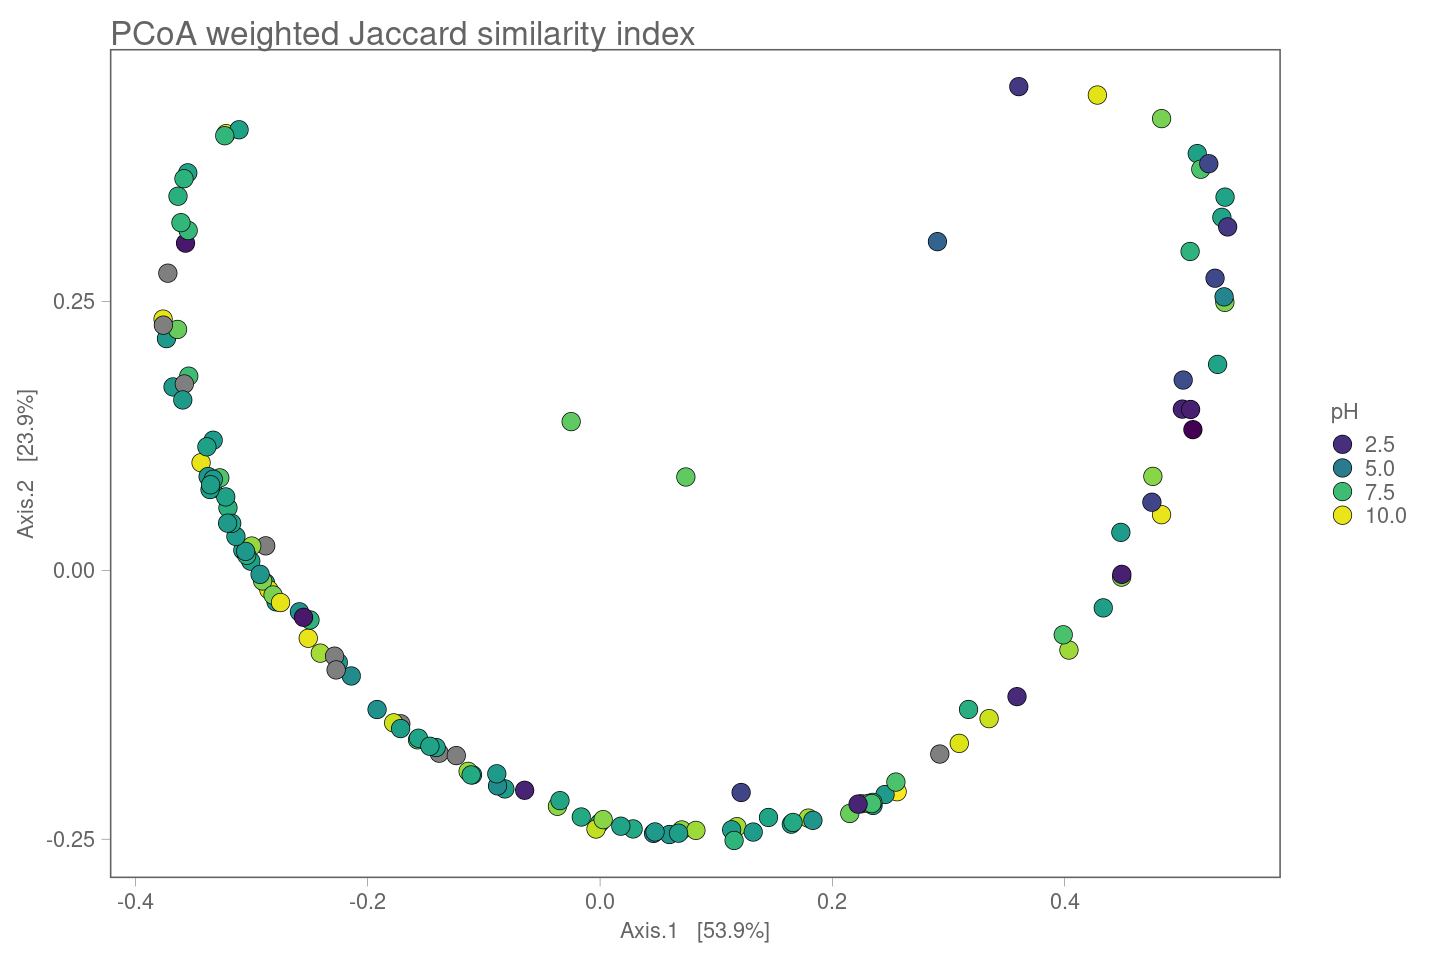

In [11]:
p1 <- plot_ordination(CAs, CAs_jw, type="sample", title="PCoA weighted Jaccard similarity index") +
#coord_fixed(sqrt(evals_jw[2] / evals_jw[1]))  + 
geom_point(aes(fill=pH), size=5, shape=21, stroke=0.3) + 
#geom_text(aes(label= sample), size=4, hjust=0.2,vjust=2) + 
scale_fill_viridis(discrete=F) +
scale_shape_manual(values=c(21:23)) +
theme_glab() + theme(legend.position = "right")+ 
guides(fill = guide_legend(override.aes = list(shape = 21))) 
p1

## nMDS weighted Jaccard

Species coordinates not found directly in ordination object. Attempting weighted average (`vegan::wascores`)



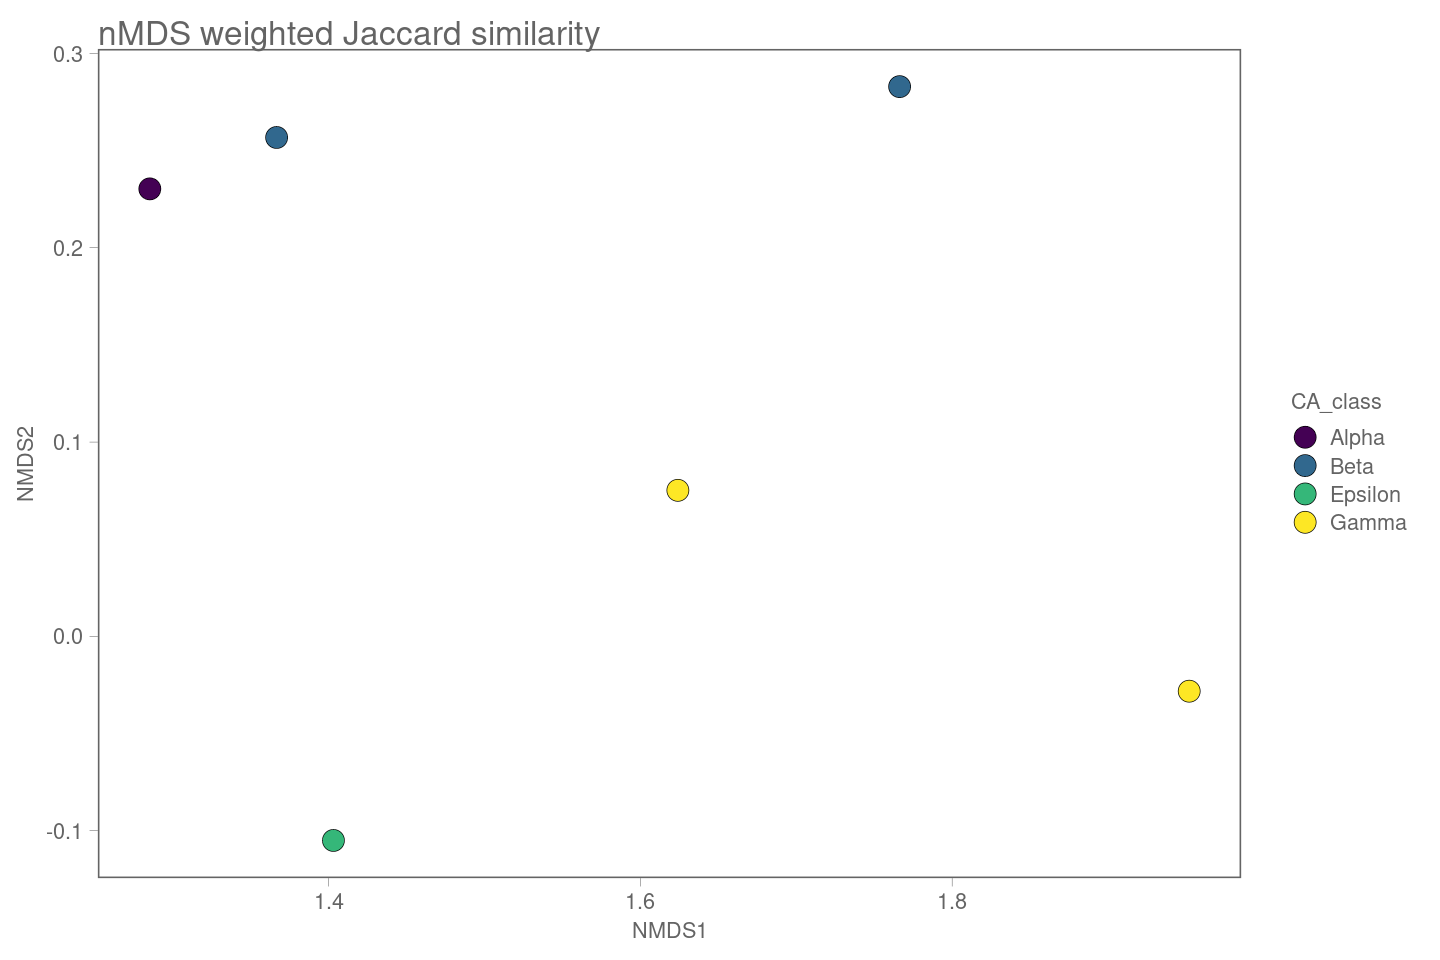

In [86]:
plot_ordination(CAs, CAs_jw, type="taxa",title="nMDS weighted Jaccard similarity") +

    geom_point(aes(fill=CA_class),shape=21, size=6,color="black",stroke=0.3) + 

    #geom_text(aes(label= nation), size=4, hjust=0.2,vjust=2) +

    scale_fill_viridis(discrete=T) + 

    scale_shape_manual(values=c(21:24)) +

    theme_glab() + theme(legend.position = "right") +

    guides(fill = guide_legend(override.aes = list(shape = 21) ),
            shape = guide_legend(override.aes = list(fill = "black")))

## nMDS unweighted jaccard

In [12]:
CAs_wjac <- phyloseq::distance(CAs, method = "jaccard")
CAs_unjac <- phyloseq::distance(CAs, method = "jaccard", binary = TRUE)

In [13]:
CAs_juw <- ordinate(CAs, CAs_unjac, method = "NMDS",trymax=100)

Run 0 stress 0.03125316 
Run 1 stress 0.07082565 
Run 2 stress 0.06597935 
Run 3 stress 0.06980079 
Run 4 stress 0.04605936 
Run 5 stress 0.04497596 
Run 6 stress 0.07682753 
Run 7 stress 0.04823969 
Run 8 stress 0.07515521 
Run 9 stress 0.04492957 
Run 10 stress 0.07238981 
Run 11 stress 0.03959347 
Run 12 stress 0.06776116 
Run 13 stress 0.04529148 
Run 14 stress 0.06340806 
Run 15 stress 0.04696502 
Run 16 stress 0.04801446 
Run 17 stress 0.06798674 
Run 18 stress 0.08430063 
Run 19 stress 0.05126544 
Run 20 stress 0.06856619 
*** Best solution was not repeated -- monoMDS stopping criteria:
     7: no. of iterations >= maxit
    13: stress ratio > sratmax


In [ ]:
plot_ordination(CAs, CAs_juw, type="samples",title="nMDS unweighted Jaccard similarity") +

        geom_point(aes(fill=nation,shape=type),size=7,color="black",stroke=0.3) + 

        #geom_text(aes(label= nation), size=4, hjust=0.4,vjust=2) + 

        scale_fill_viridis(discrete=TRUE) + scale_shape_manual(values=c(21:24)) +

        theme_glab() + theme(legend.position = "right") +

        guides(fill = guide_legend(override.aes = list(shape = 21) ),
              shape = guide_legend(override.aes = list(fill = "black")))

In [14]:
CAs_jw <- ordinate(CAs,CAs_wjac, method = "NMDS",trymax=100)

Run 0 stress 0.06429154 
Run 1 stress 0.07315917 
Run 2 stress 0.07341641 
Run 3 stress 0.0717095 
Run 4 stress 0.06391688 
... New best solution
... Procrustes: rmse 0.004020358  max resid 0.03695657 
Run 5 stress 0.06479978 
Run 6 stress 0.064837 
Run 7 stress 0.06206401 
... New best solution
... Procrustes: rmse 0.02752989  max resid 0.2736994 
Run 8 stress 0.07162026 
Run 9 stress 0.07359725 
Run 10 stress 0.0640612 
Run 11 stress 0.07285686 
Run 12 stress 0.07259775 
Run 13 stress 0.07198184 
Run 14 stress 0.0739271 
Run 15 stress 0.0648554 
Run 16 stress 0.06289328 
Run 17 stress 0.07211361 
Run 18 stress 0.07515974 
Run 19 stress 0.0718518 
Run 20 stress 0.0725994 
*** Best solution was not repeated -- monoMDS stopping criteria:
     5: no. of iterations >= maxit
    15: stress ratio > sratmax


In [ ]:
plot_ordination(CAs, CAs_jw, type="samples",title="nMDS weighted Jaccard similarity") +

    geom_point(aes(fill=nation, shape=type),size=6,color="black",stroke=0.3) + 

    #geom_text(aes(label= nation), size=4, hjust=0.2,vjust=2) +

    scale_fill_viridis(discrete=T) + 

    scale_shape_manual(values=c(21:24)) +

    theme_glab() + theme(legend.position = "right") +

    guides(fill = guide_legend(override.aes = list(shape = 21) ),
            shape = guide_legend(override.aes = list(fill = "black")))

In [ ]:
plot_ordination(CAs, CAs_jw, type="samples",title="nMDS weighted Jaccard similarity") +

    geom_point(aes(fill=pH,shape=nation),size=6,color="black",stroke=0.3) + 

    #geom_text(aes(label= nation), size=4, hjust=0.2,vjust=2) +

    scale_fill_viridis(discrete=F) + 

    scale_shape_manual(values=c(21:25)) +

    theme_glab() + theme(legend.position = "right") +

    guides(fill = guide_legend(override.aes = list(shape = 21) ),
            shape = guide_legend(override.aes = list(fill = "black")))

## Vector Fitting Weighted Jaccard

In [15]:
nmds_df1_jw<-cbind(sample_data(CAs),CAs_jw$points)
nmds_df1_jw

,expedition,nation,site_name,latitude,longitude,type,temperature,pH,C13,dissolved_oxygen,salinity,alkalinity,spc,MDS1,MDS2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AG11,ARG19,Argentina,Pastos Grandes,-24.364589,-66.57113,S,44.90,8.74,-15.33,50.0,0.61,15.400,1288.0,-0.091387352,-0.43187253
AG19,ARG19,Argentina,Botijuela,-25.743034,-67.82325,S,40.00,6.44,NA,10.0,8.65,700.480,14643.0,-0.854322829,-0.26303588
AG1,ARG19,Argentina,Incachule,-24.282129,-66.46676,S,46.90,6.52,NA,10.0,1.54,NA,3000.0,-0.934990769,-0.29345237
AG3,ARG19,Argentina,Pompeya,-24.246688,-66.36272,S,50.30,6.53,-5.33,10.0,5.09,930.309,9000.0,0.002026765,-0.06234391
AO190224-f,ARG19,Argentina,Antuco,-24.182136,-66.67403,F,27.80,6.25,-7.66,90.0,21.21,239.800,33411.0,-0.202710461,-0.08066779
BJ190227-f,ARG19,Argentina,Botijuela,-25.743034,-67.82325,F,40.00,6.44,NA,10.0,8.65,700.480,14643.0,2.517167875,0.38970066
PG190225-f,ARG19,Argentina,Pastos Grandes,-24.364589,-66.57113,F,44.90,8.74,-15.33,50.0,0.61,15.400,1288.0,0.168354502,0.21747976
PM190223-f,ARG19,Argentina,Pompeya,-24.246688,-66.36272,F,50.30,6.53,-5.33,10.0,5.09,930.309,9000.0,0.369553847,-0.22817082
VV190228-f,ARG19,Argentina,Villa Vil,-27.112858,-66.82224,F,38.20,9.09,-13.28,60.0,0.40,29.040,869.0,-0.665265224,-0.25941188


In [16]:
nmds_df1.1_jw <- nmds_df1_jw[,4:15]

nmds_df1.1_jw <- nmds_df1.1_jw[ -c(3) ]

nmds_df1.1_jw


,latitude,longitude,temperature,pH,C13,dissolved_oxygen,salinity,alkalinity,spc,MDS1,MDS2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AG11,-24.364589,-66.57113,44.90,8.74,-15.33,50.0,0.61,15.400,1288.0,-0.091387352,-0.43187253
AG19,-25.743034,-67.82325,40.00,6.44,NA,10.0,8.65,700.480,14643.0,-0.854322829,-0.26303588
AG1,-24.282129,-66.46676,46.90,6.52,NA,10.0,1.54,NA,3000.0,-0.934990769,-0.29345237
AG3,-24.246688,-66.36272,50.30,6.53,-5.33,10.0,5.09,930.309,9000.0,0.002026765,-0.06234391
AO190224-f,-24.182136,-66.67403,27.80,6.25,-7.66,90.0,21.21,239.800,33411.0,-0.202710461,-0.08066779
BJ190227-f,-25.743034,-67.82325,40.00,6.44,NA,10.0,8.65,700.480,14643.0,2.517167875,0.38970066
PG190225-f,-24.364589,-66.57113,44.90,8.74,-15.33,50.0,0.61,15.400,1288.0,0.168354502,0.21747976
PM190223-f,-24.246688,-66.36272,50.30,6.53,-5.33,10.0,5.09,930.309,9000.0,0.369553847,-0.22817082
VV190228-f,-27.112858,-66.82224,38.20,9.09,-13.28,60.0,0.40,29.040,869.0,-0.665265224,-0.25941188


In [17]:
message("Test with Pearson correlation vs NMDS1:")
# Pearson
for (i in 1:length(nmds_df1.1_jw)) {
    a <- cor.test(nmds_df1.1_jw[,i], nmds_df1.1_jw$MDS1)
       if (a$p.value<0.05) {
           print(paste(i,colnames(nmds_df1.1_jw)[i],a$estimate, a$parameter, a$p.value))
       }
}

message("Test with Pearson correlation vs NMDS2:")
# Pearson
for (i in 1:length(nmds_df1.1_jw)) {
    a <- cor.test(nmds_df1.1_jw[,i], nmds_df1.1_jw$MDS2)
       if (a$p.value<0.01) {
           print(paste(i,colnames(nmds_df1.1_jw)[i],a$estimate, a$parameter, a$p.value))
       }
}

Test with Pearson correlation vs NMDS1:



[1] "2 longitude 0.248511133814712 138 0.00306988879670484"
[1] "3 temperature 0.389191986020838 128 4.73104297007404e-06"
[1] "4 pH -0.206402391217658 127 0.0189358459116513"
[1] "7 salinity -0.245366311181784 118 0.00691018425009962"
[1] "9 spc -0.215432427460281 123 0.0158299275956649"
[1] "10 MDS1 1 138 0"


Test with Pearson correlation vs NMDS2:



[1] "11 MDS2 1 138 0"


In [84]:
env_jw <-envfit(nmds_df1.1_jw[,c(10:11)], nmds_df1.1_jw[,c(1:9)], perm = 9999, na.rm = T)
env_jw


***VECTORS

                     MDS1     MDS2     r2 Pr(>r)  
latitude         -0.22998  0.97320 0.0657 0.5478  
longitude        -0.23057  0.97305 0.0627 0.5632  
temperature       0.58008 -0.81456 0.3983 0.0123 *
pH               -0.59746 -0.80190 0.2317 0.0891 .
C13              -0.33401  0.94257 0.1370 0.2654  
dissolved_oxygen -0.07683  0.99704 0.0152 0.8698  
salinity         -0.34695  0.93788 0.2430 0.0722 .
alkalinity       -0.32239  0.94661 0.0657 0.5481  
spc              -0.39283  0.91961 0.1978 0.1205  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Permutation: free
Number of permutations: 9999

119 observations deleted due to missingness

ERROR: Error in eval(expr, envir, enclos): object 'env.scores' not found


In [93]:
env.scores_jw <- as.data.frame(scores(env_jw, display = "vectors"))         #extracts relevant scores from envifit
env.scores_jw <- cbind(env.scores_jw, env.variables = rownames(env.scores_jw)) #and then gives them their names

env.scores_jw <- cbind(env.scores_jw, pval = env_jw$vectors$pvals) # add pvalues to dataframe
sig.env.scrs_jw <- subset(env.scores_jw, pval<=0.09) #subset data to show variables significant at 0.05

sig.env.scrs_jw

,MDS1,MDS2,env.variables,pval
,<dbl>,<dbl>,<chr>,<dbl>
temperature,0.3660808,-0.5140532,temperature,0.0123
pH,-0.2875954,-0.3860059,pH,0.0891
salinity,-0.1710156,0.4622925,salinity,0.0722


In [101]:
en_coord_cont.1_jw = sig.env.scrs_jw[,1:2] * ordiArrowMul(env_jw)
en_coord_cont.1_jw

,MDS1,MDS2
,<dbl>,<dbl>
temperature,0.5939109,-0.8339738
pH,-0.4665801,-0.6262364
salinity,-0.2774471,0.7500000


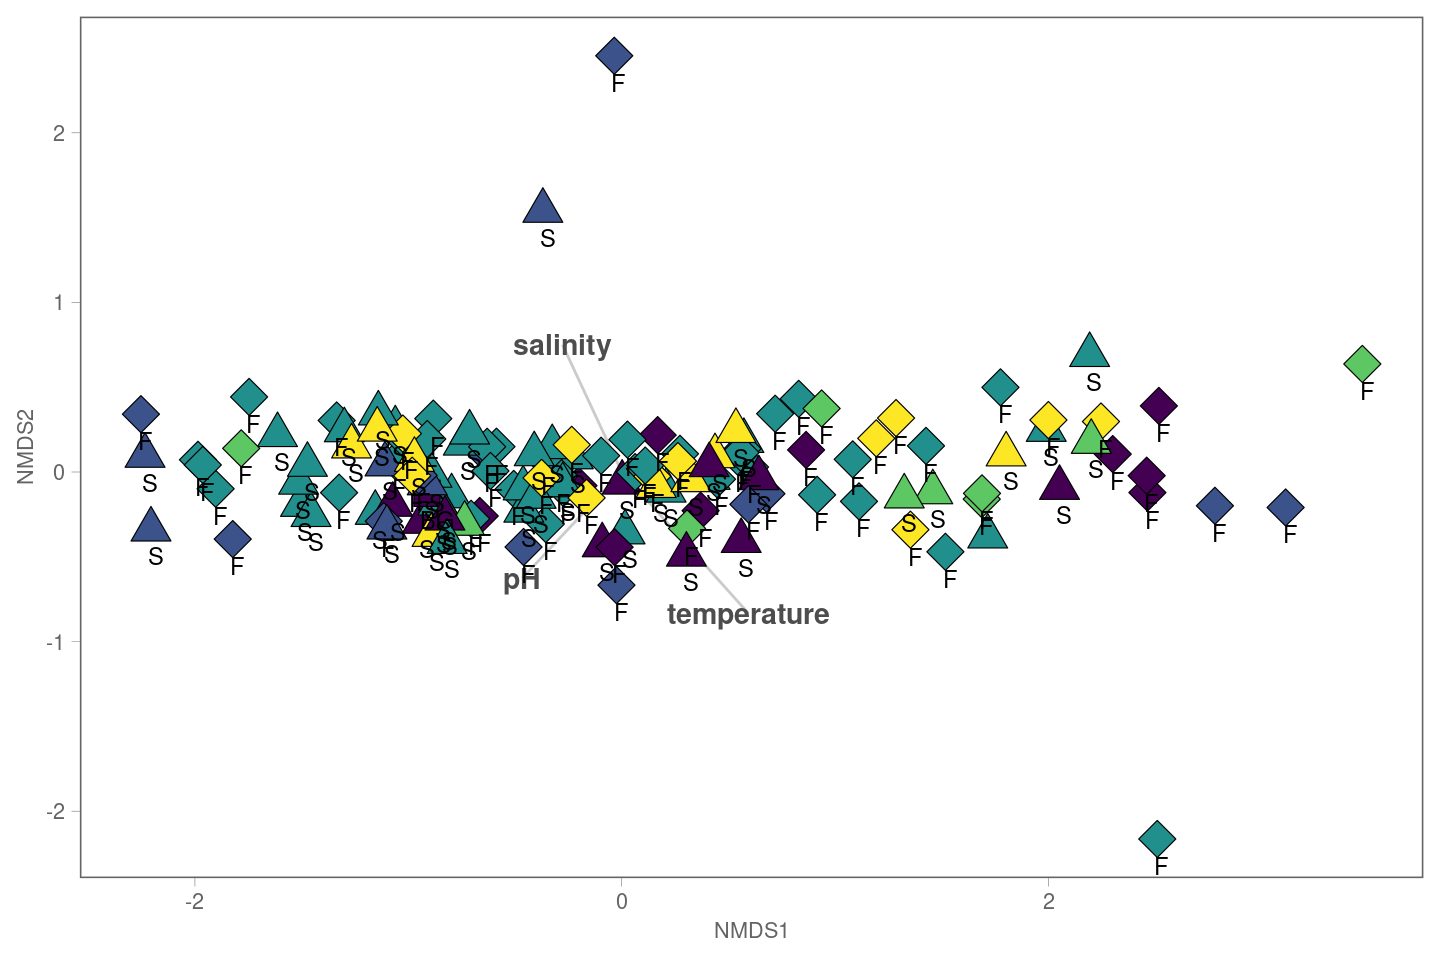

In [110]:
nmds_jw_envfit <- ggplot(data = nmds_df1_jw, aes(x = MDS1, y = MDS2)) + 
     
        geom_segment(data = en_coord_cont.1_jw, aes(x = 0, y = 0, xend = MDS1, yend = MDS2), 
                            size =.8, alpha = 0.8, colour = "grey") + 
     
        geom_text(data = en_coord_cont.1_jw, aes(x = MDS1, y = MDS2), colour = "grey30", 
                         fontface = "bold", size=6, label = row.names(en_coord_cont.1_jw)) + 
     
        geom_point(aes(fill = nation ,shape = type), size = 8) +
    
        scale_fill_viridis(discrete=TRUE) +
     
        scale_shape_manual(values = c(24,22,23,24,25)) + 
     
        geom_text(aes(label = type), size=5, hjust=0.2, vjust=2) +
     
        theme(axis.title = element_text(size = 15, face = "bold", colour = "black"), 
                   panel.background = element_blank(), panel.border = element_rect(fill = NA, colour = "black"), 
                   axis.ticks = element_blank(), legend.key = element_blank(), 
                   legend.title = element_text(size = 10, face = "bold", colour = "grey30"), 
                   legend.text = element_text(size = 9, colour = "grey30")) + 
       
        xlab("NMDS1") + ylab("NMDS2") + 
       
        guides(fill = guide_legend(override.aes = list(shape = 22) ),
            shape = guide_legend(override.aes = list(fill = "black"))) + 
        
        theme_glab() + 

        theme(legend.position = "none")

nmds_jw_envfit